In [15]:
import numpy as np
import pandas as pd
import monthdelta
import pandas_datareader.data as pdr

import pickle

# Save object as pickle
def save_object(obj, filename):
    with open(filename, 'wb') as output:
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
 
# load object
def load_object(filename):
    with open(filename, 'rb') as output:
        return pickle.load(output)

In [16]:
start = "1949/5/16"
end = "2016/9/30"
N225 = pdr.DataReader("NIKKEI225", "fred", start, end)

In [17]:
N225.head()

,NIKKEI225
DATE,
1949-05-16,176.21
1949-05-17,174.80
1949-05-18,172.53
1949-05-19,171.34
1949-05-20,169.20


In [18]:
N225.tail()

,NIKKEI225
DATE,
2016-09-26,16544.56
2016-09-27,16683.93
2016-09-28,16465.40
2016-09-29,16693.71
2016-09-30,16449.84


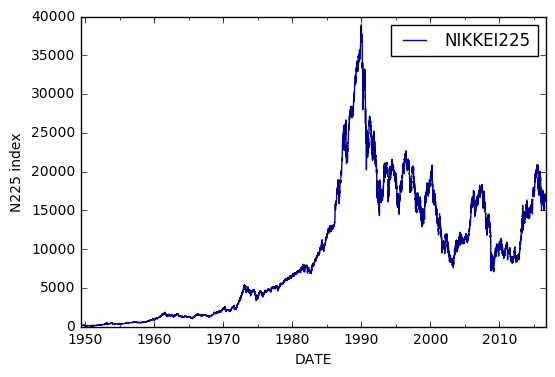

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
N225.plot(color='darkblue')
plt.ylabel('N225 index')

## N225 4 numbers

In [20]:
price = pdr.DataReader("^N225", 'yahoo', "1984/1/4", end)

In [21]:
price.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1984-01-04,9927.0,9927.0,9927.0,9927.0,0,9927.0
1984-01-05,9947.0,9947.0,9947.0,9947.0,0,9947.0
1984-01-06,9961.0,9961.0,9961.0,9961.0,0,9961.0
1984-01-09,9954.0,9954.0,9954.0,9954.0,0,9954.0
1984-01-10,10016.0,10016.0,10016.0,10016.0,0,10016.0


In [22]:
print(price.tail(1))

                    Open          High           Low         Close  Volume  \
Date                                                                         
2016-09-30  16474.449219  16497.550781  16407.779297  16449.839844  120700   

               Adj Close  
Date                      
2016-09-30  16449.839844  


In [23]:
import pandas as pd
# DEXJPUSはfredのドル円のレートを指定するコード
fx = pdr.DataReader('DEXJPUS','fred', start, end)
port = pd.concat([price.Close, fx], axis = 1).dropna()

In [24]:
fx.head()

,DEXJPUS
DATE,
1971-01-04,357.73
1971-01-05,357.81
1971-01-06,357.86
1971-01-07,357.87
1971-01-08,357.82


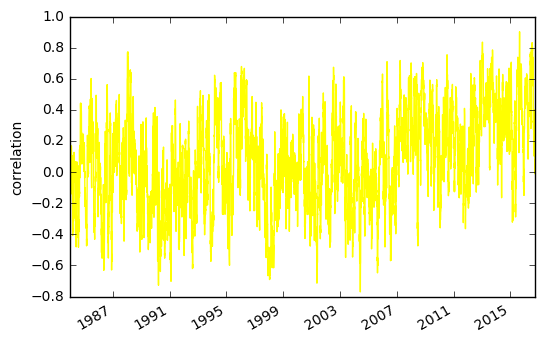

In [26]:
n = port.Close.pct_change().dropna()
f = port.DEXJPUS.pct_change().dropna()
f.rolling(window=20).corr(n).plot(color='yellow')
plt.ylabel('correlation')

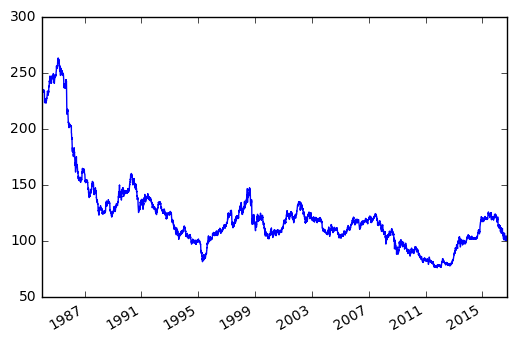

In [31]:
port.DEXJPUS.plot()

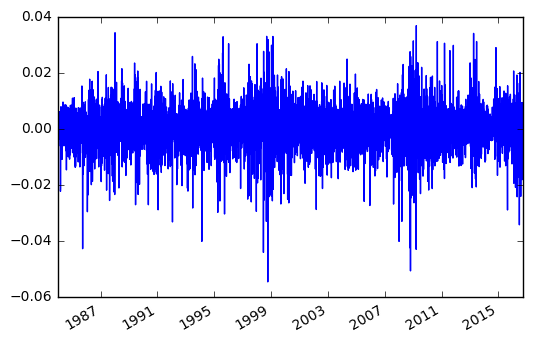

In [32]:
port.DEXJPUS.pct_change().plot()

Series, DataFrame, and Panel all have a method pct_change to compute the percent change over a given number of periods (using fill_method to fill NA/null values before computing the percent change).

In [48]:
ser = pd.Series(np.random.rand(100))

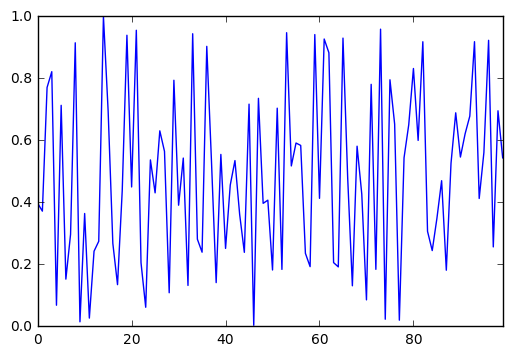

In [49]:
ser.plot()

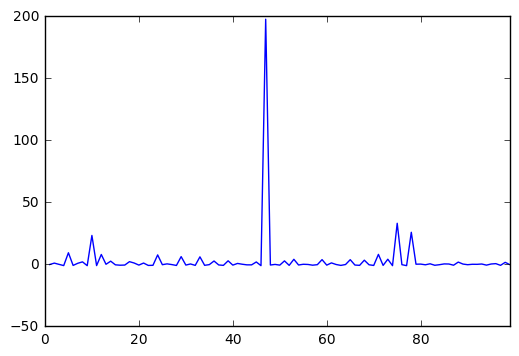

In [50]:
ser.pct_change().plot()

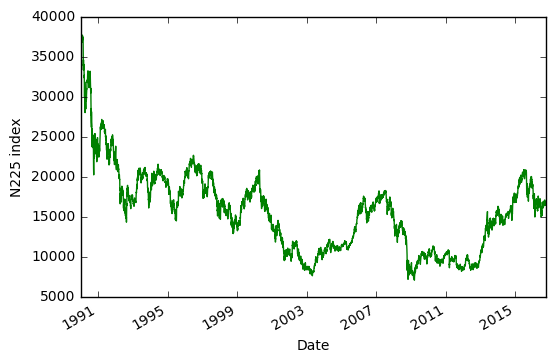

In [55]:
price = pdr.DataReader("^N225", 'yahoo', start, end)
price1 = price.ix['1990/1/1':]
price1.Close.plot(color='green')
price2 = price.ix['2015', 0:2]
price2.tail(1)
plt.ylabel('N225 index')

In [56]:
price2.tail()

,Open,High
Date,,
2015-12-24,19071.410156,19071.410156
2015-12-25,18823.910156,18870.699219
2015-12-28,18838.910156,18922.900391
2015-12-29,18843.390625,18991.009766
2015-12-30,19070.830078,19113.179688


In [57]:
# 月初の数値をサンプリング(日付は月末)
price.resample('M').first().head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1984-01-31,9927.0,9927.0,9927.0,9927.0,0,9927.0
1984-02-29,10201.0,10201.0,10201.0,10201.0,0,10201.0
1984-03-31,9920.0,9920.0,9920.0,9920.0,0,9920.0
1984-04-30,11050.0,11050.0,11050.0,11050.0,0,11050.0
1984-05-31,11013.0,11013.0,11013.0,11013.0,0,11013.0


In [58]:
# 月末の数値をサンプリング(日付は月末)
price.resample('M').last().head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1984-01-31,10196.0,10196.0,10196.0,10196.0,0,10196.0
1984-02-29,10031.0,10031.0,10031.0,10031.0,0,10031.0
1984-03-31,10929.0,10929.0,10929.0,10929.0,0,10929.0
1984-04-30,10981.0,10981.0,10981.0,10981.0,0,10981.0
1984-05-31,9940.0,9940.0,9940.0,9940.0,0,9940.0


In [59]:
# データはそのままに日付を１日に先に設定
price.resample('M', loffset='1d').last().head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1984-02-01,10196.0,10196.0,10196.0,10196.0,0,10196.0
1984-03-01,10031.0,10031.0,10031.0,10031.0,0,10031.0
1984-04-01,10929.0,10929.0,10929.0,10929.0,0,10929.0
1984-05-01,10981.0,10981.0,10981.0,10981.0,0,10981.0
1984-06-01,9940.0,9940.0,9940.0,9940.0,0,9940.0


In [64]:
price.resample('M').mean().head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1984-01-31,10083.842105,10083.842105,10083.842105,10083.842105,0.0,10083.842105
1984-02-29,10008.428571,10008.428571,10008.428571,10008.428571,0.0,10008.428571
1984-03-31,10319.190476,10319.190476,10319.190476,10319.190476,0.0,10319.190476
1984-04-30,10919.850000,10919.850000,10919.850000,10919.850000,0.0,10919.850000
1984-05-31,10522.318182,10522.318182,10522.318182,10522.318182,0.0,10522.318182


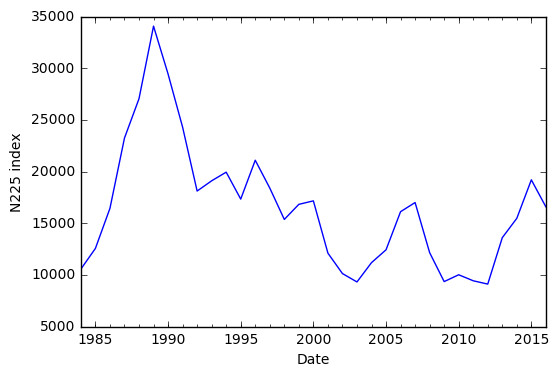

In [67]:
price.resample('A').mean().Close.plot()
plt.ylabel('N225 index')

In [68]:
import numpy as np
dp = np.log(price.Close).diff()
vol = dp.std() * np.sqrt(250)
print(vol, len(price))

0.230959043251 8064


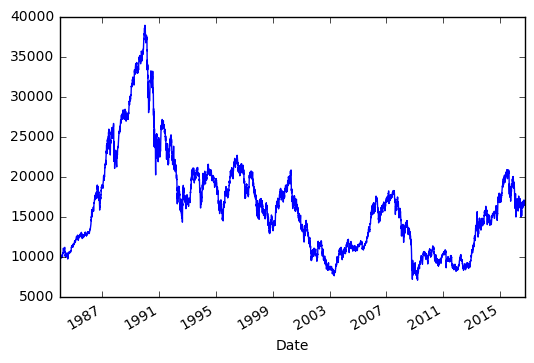

In [71]:
price.Close.plot()

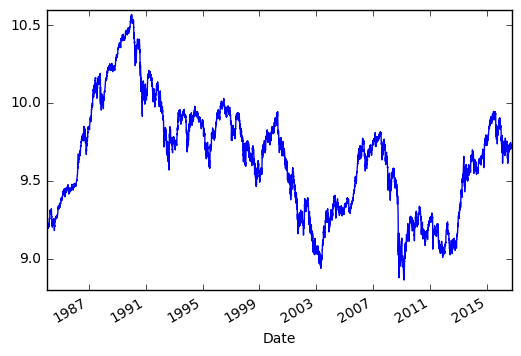

In [72]:
np.log(price.Close).plot()

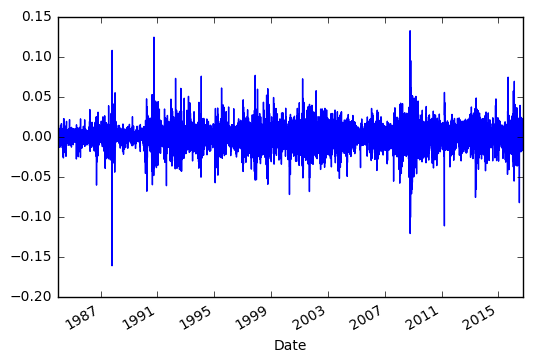

In [74]:
np.log(price.Close).diff().plot() # 差分

In [76]:
np.log(price.Close).diff().std()

0.014607132457739551

In [77]:
np.sqrt(250)
# 統計学では年間の営業日には250日（または260日）を使うのが普通です。

15.811388300841896